In [1]:
#Import the python libraries
import matplotlib.pyplot as plt        # Python 2D plotting library 
import numpy as np                     #Core library for linear algebra and scientific computing 
import os                              # module for using operating system dependent functionality
from IPython.display import Image      #Module to display image. IPython is an interactive command-line terminal for Python
import matplotlib.font_manager as fm   #A module for finding, managing, and using fonts across platforms.

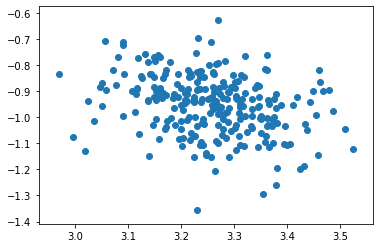

In [2]:
#Load data from file for plotting 
data1 = np.genfromtxt('mull_ex_vs_charges_noIP_ex1st', usecols=(1,2), skip_header=1) # Read file, use 2nd and 3rd column and skip header
X1 = data1[:, 0]                                                                     # Assign data column as X axis values 
Y1 = data1[:, 1]                                                                     # Assign data column as X axis values
plt.scatter(X1, Y1)                                                                  # Scatter plot

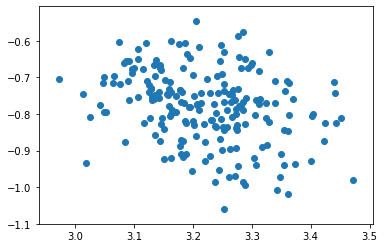

In [3]:
#Load data from another file for plotting 
data2 = np.genfromtxt('mull_charge_ex_final_CIP_ex1st', usecols=(1,2), skip_header=1)
X2 = data2[:, 0]
Y2 = data2[:, 1]
plt.scatter(X2, Y2)

Text(0.5, 1.0, 'Scatter plot with regression line')

findfont: Font family ['helvetica.ttf'] not found. Falling back to DejaVu Sans.
findfont: Font family ['helvetica.ttf'] not found. Falling back to DejaVu Sans.


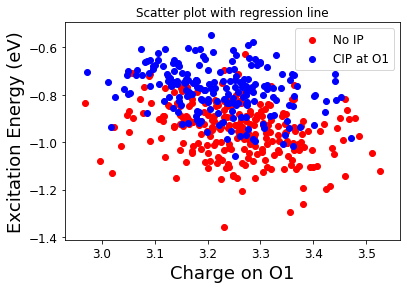

In [7]:
#Plot data from two different files on same plot

#Data from first file
plt.scatter(X1, Y1, color='red', label="No IP")
#Data from second file
plt.scatter(X2, Y2, color='blue', label="CIP at O1")

#Formatting the plot fields
import sys
if sys.platform == 'linux':
    fontprop = fm.FontProperties("STIXGeneral",size=12)
else:
    fontprop = fm.FontProperties(fname='/Library/Fonts/'helvetica.ttf',size=12) #Using different fonts
    

plt.legend(prop=fontprop)                                                   #Formatting legend
plt.xlabel("Charge on O1", fontproperties=fontprop, fontsize=18)            #Formatting X axis label
plt.ylabel("Excitation Energy (eV)", fontproperties=fontprop, fontsize=18)  #Formatting Y axis label
plt.xticks(fontsize=11, fontproperties=fontprop)                            #Formatting the x axis ticks
plt.yticks(fontsize=11, fontproperties=fontprop)                            #Formatting the Y axis ticks
plt.title('Scatter plot with regression line')                              #Title of the plot

## The Linear Regression Equation:

The first equation below is the basic form of the regression line. It is simply the equation for a straight line, which you probably learned in high school math. The two new notational items are b and a which are the slope and the intercept of the regression line for predicting Y from X. The slope is how much the Y scores increase per unit of X score increase. The slope in the figure above is approximately. The intercept is the point at which the line crosses the Y axis (i.e., the point at which X is equal to zero. The equations for computing the slope and intercept of the line are listed as the second and third equations, respectively.

Equation of a straight line:
$$Y=bX+a$$
Slope:
\begin{equation}
b=\frac{N\sum(XY)-(\bar{X}\bar{Y})}{N\sum(X^2-(\bar{X})^2)}
\end{equation}
Intercept:
$$a=\bar{Y}-b\bar{X}$$

best fit line:
y = 0.11 + -0.33x
best fit line:
y = 0.19 + -0.30x


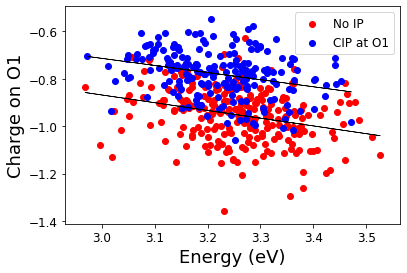

In [8]:
# Adding best fit line to the plot 
# 1 - Best fit line using your own function
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

#Scattered plot with fitted line for data from first file
plt.scatter(X1, Y1, color='red', label="No IP")
a, b = best_fit(X1, Y1)
yfit = [a+b*xi for xi in X1]
plt.plot(X1, yfit, linestyle='-', linewidth=0.7, color="black")


# 2 - Best fit line using python library scipy
from scipy import stats                        # Import scipy library 

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(X2, Y2) #Check stats.linregress() for more details
print('best fit line:\ny = {:.2f} + {:.2f}x'.format(intercept, slope))
line = slope*X2 + intercept

#Plot data points are fitted line 
plt.scatter(X2, Y2, color='blue', label="CIP at O1")
plt.plot(X2, line, 'black', linewidth=0.7) 

#Styling
plt.legend(prop=fontprop,frameon=True)
plt.ylabel("Charge on O1", fontproperties=fontprop, fontsize=18)
plt.xlabel("Energy (eV)", fontproperties=fontprop, fontsize=18)
plt.xticks(fontsize=15, fontproperties=fontprop)
plt.yticks(fontsize=15, fontproperties=fontprop)
plt.savefig(os.getcwd()+'/scatter_plot.png', dpi=300, bbox_inches='tight')  # Save image, one can play around with resolution

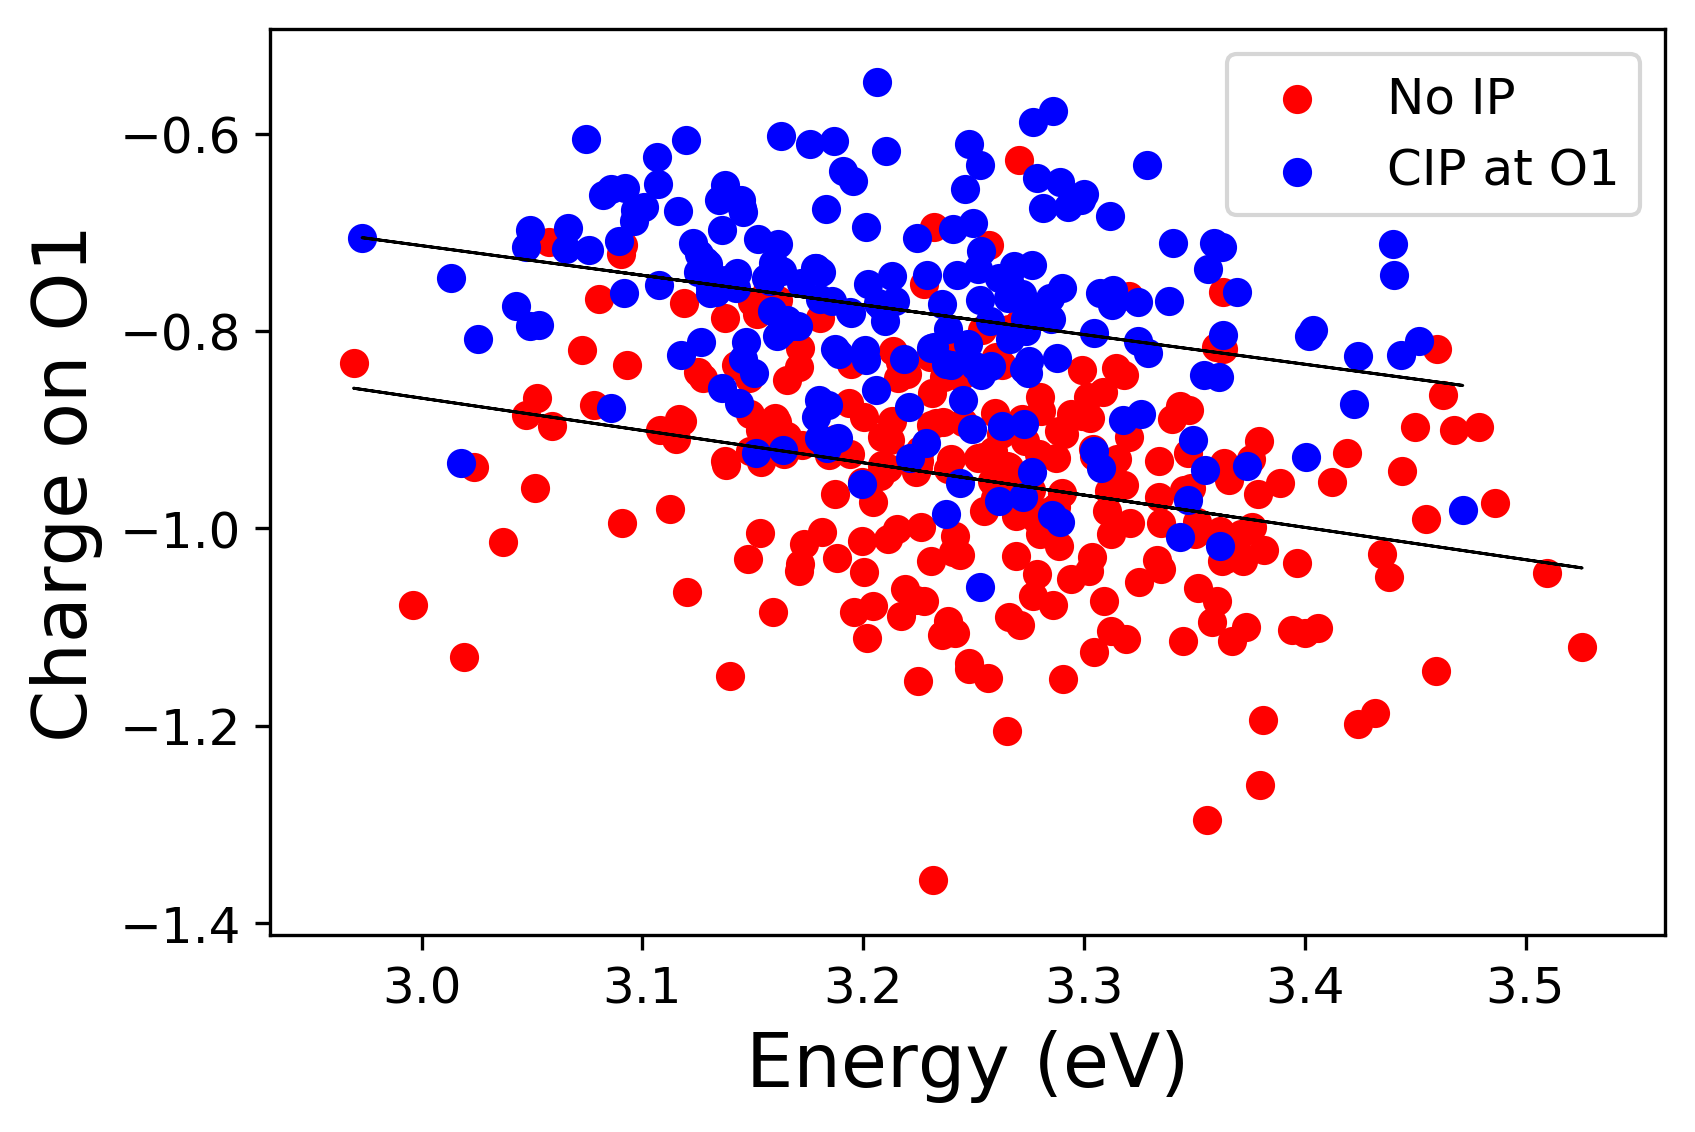

In [9]:
# View the saved image
Image(filename=os.getcwd()+"/scatter_plot.png")

## Kernel Density Plots, Density Trace Graph.

A Density Plot visualises the distribution of data over a continuous interval or time period. This chart is a variation of a Histogram that uses kernel smoothing to plot values, allowing for smoother distributions by smoothing out the noise. The peaks of a Density Plot help display where values are concentrated over the interval.

An advantage Density Plots have over Histograms is that they're better at determining the distribution shape because they're not affected by the number of bins used (each bar used in a typical histogram). A Histogram comprising of only 4 bins wouldn't produce a distinguishable enough shape of distribution as a 20-bin Histogram would. However, with Density Plots, this isn't an issue.

If we pass the full two-dimensional dataset to kdeplot, we will get a two-dimensional visualization of the data.

findfont: Font family ['helvetica.ttf'] not found. Falling back to DejaVu Sans.


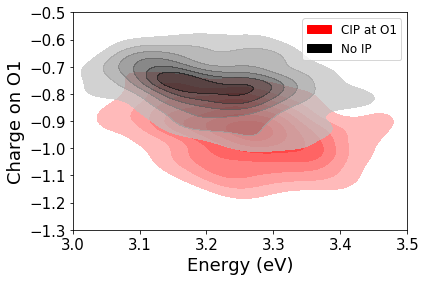

In [10]:
# Import python 
import seaborn as sns  

# Kernel Density plots for two-dimensional data set
sns.kdeplot(X1, Y1, color="red", n_levels=7, shade=True, shade_lowest=False, label="CIP at O1") #Plotting first data set

sns.kdeplot(X2, Y2, color="black", n_levels=7, alpha=0.7, shade=True, shade_lowest=False, label="No IP") #Plotting second data set

#Styling
plt.legend(prop=fontprop, frameon=True)
plt.ylabel("Charge on O1", fontproperties=fontprop, fontsize=18)
plt.xlabel("Energy (eV)", fontproperties=fontprop, fontsize=18)
plt.xlim(3.0, 3.5)                                                #Set limit for x axis 
plt.ylim(-1.3, -0.5)                                              #Set limit for x axis
plt.xticks(fontproperties=fontprop, fontsize=15)
plt.yticks(fontproperties=fontprop, fontsize=15)
plt.savefig(os.getcwd()+'/kde_plot.png', dpi=300, bbox_inches='tight');